## 분류 및 예측 
# Neural Network ( 신경망 알고리즘 )

- <a href="2016_2_DM_MBA_08.pdf"> 이론 설명 </a>

- 간단한 정리 
 - 입력 값을 hidden layer 층에 있는 함수를 활용하여 실측값과 예측값의 차를 Gradient decent 알고리즘을 활용하여 줄여나가는 방법
 - 그 알고리즘의 대략적인 모습을 오류 역전파 알고리즘을 활용한다. 그 안에서 가중치를 변화시켜나가는 모습을 Gradient decent을 활용

## 1. Neural Network Analysis using nnet package

In [56]:
#install.packages("nnet", repos='http://cran.us.r-project.org')   # 시각화에 부족 
#install.packages("devtools", repos='http://cran.us.r-project.org')
#install.packages("NeuralNetTools", repos='http://cran.us.r-project.org')   
#install.packages("neuralnet", repos='http://cran.us.r-project.org')

In [57]:
library(nnet)
library(caret)
library(ROCR)

 - garson을 사용해야 어떤 변수가 의미 있는지 / 모델에 최적화 되어 있는지 나옴
 - C5.0은 명목형만 예측 가능
 - Neural Network은 모두 가능하나, 추가 기능을 위해서는 바꿔두자!

In [58]:
cb <- read.delim("../1022_Decision Tree_2/Hshopping.txt", stringsAsFactors=FALSE)
colnames(cb) <- c("ID","SEX","AGE","AMT","STAR","REFUND")
cb$REFUND <- factor(cb$REFUND)	# 명목형 값 예측일 경우

In [59]:
head(cb)

ID SEX AGE AMT STAR REFUND
1  1   1  33   2    2      0
2  2   2  21   3    2      1
3  3   1  45   1    1      0
4  4   1  50   2    1      0
5  5   1  21   3    1      1
6  6   1  22   3    1      1

In [60]:
set.seed(1)
inTrain <- createDataPartition(y=cb$REFUND, p=0.6, list=FALSE)
cb.train <- cb[inTrain,]
cb.test <- cb[-inTrain,]

In [61]:
nrow(cb.train)
nrow(cb)

[1] 301

[1] 500

 - value = a matrix which is zero except for the column corresponding to the class.
 - iter = how many times to do 
 - decay 값 : learing rate를 조절할 수 있는 변수. 
 - Too many size : 모델이 복잡해진다. ( 학습모델 성능은 올라가나, Overfitting issue 발생)
 - maxit : 300명을 1,000번 반복한다. ( 어느 정도 수렴하면 중간에 멈출 수 있다.)

In [62]:
set.seed(123)
nn_model <- nnet(REFUND ~ SEX+AGE+AMT+STAR, data=cb.train, size=3, maxit=1000)	# size=hidden node수

# weights:  19
initial  value 200.606812 
iter  10 value 86.410893
iter  20 value 81.774551
iter  30 value 76.044092
iter  40 value 66.203022
iter  50 value 63.924238
iter  60 value 63.114128
iter  70 value 62.903511
iter  80 value 62.611800
iter  90 value 61.959741
iter 100 value 61.008848
iter 110 value 60.720699
iter 120 value 60.606332
iter 130 value 60.567764
iter 140 value 60.525918
iter 150 value 60.122685
iter 160 value 58.872856
iter 170 value 57.464777
iter 180 value 54.280672
iter 190 value 52.030947
iter 200 value 51.313490
iter 210 value 51.163216
iter 220 value 50.760753
iter 230 value 50.498295
iter 240 value 50.413091
iter 250 value 50.356870
iter 260 value 50.236148
iter 270 value 50.013988
iter 280 value 49.924165
iter 290 value 49.877182
iter 300 value 49.817089
iter 310 value 49.417883
iter 320 value 49.412835
iter 330 value 49.409880
iter 340 value 49.407560
iter 350 value 49.404695
iter 360 value 49.403964
iter 370 value 49.403629
iter 380 value 49.402962
iter 390

 - input 4, nodes in layer 3, output 1
 - inputs features 
 - output features

In [63]:
nn_model

a 4-3-1 network with 19 weights
inputs: SEX AGE AMT STAR 
output(s): REFUND 
options were - entropy fitting 

In [64]:
nn_model2 <- nnet(REFUND ~ SEX+AGE+AMT+STAR, data=cb.train, size=3, maxit=1000, decay=0.0005)	# size=hidden node수 
nn_model2

# weights:  19
initial  value 188.455489 
iter  10 value 186.884010
iter  20 value 116.019341
iter  30 value 68.883514
iter  40 value 64.999846
iter  50 value 64.366346
iter  60 value 64.047564
iter  70 value 63.339082
iter  80 value 63.061496
iter  90 value 62.997478
iter 100 value 62.079425
iter 110 value 60.713646
iter 120 value 59.860945
iter 130 value 59.738794
iter 140 value 59.709494
iter 150 value 59.459964
iter 160 value 59.075659
iter 170 value 54.856130
iter 180 value 54.170073
iter 190 value 51.815439
iter 200 value 51.531017
iter 210 value 51.429588
iter 220 value 51.418538
iter 230 value 51.405428
iter 240 value 51.399043
final  value 51.395229 
converged


a 4-3-1 network with 19 weights
inputs: SEX AGE AMT STAR 
output(s): REFUND 
options were - entropy fitting  decay=0.0005

 - i : input data
 - b : bias (세타 값 : 시그모이드 함수의 임계) => 맨 앞줄의 b->h_i들의 값들이 시그모이드 임계 (세타)
 - rang 옵션 : weight의 값들의 범위를 지정해 줄 수 있다. 
 - 각 방향에 따라 i1 -> h1 즉, 첫번째 Input값이 hidden layer 1 node에 가는 가중치가 -101.85이다.
 - 선 12개 from 4개 변수 to 3개 노드 + 3개 노드 to 결과치 1개 노드 + bias 4개 = 19 weight

In [65]:
summary(nn_model)

a 4-3-1 network with 19 weights
options were - entropy fitting 
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1 
  26.33 -101.85    3.32  -69.49   47.08 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2 
-243.83  100.35   -7.51   97.79   20.53 
  b->h3  i1->h3  i2->h3  i3->h3  i4->h3 
 -86.52  -17.34    5.66   18.53  -74.97 
   b->o   h1->o   h2->o   h3->o 
   0.57  -35.69   53.31   -2.57 

 - predict만 넣으면, 예측 확율이 나오고 class라고 넣었으니 실제 predict rate이 나온다
 - 같은 predict여도, C5.0 or Neural에 따라 결과값이 달라진다

In [66]:
confusionMatrix(predict(nn_model, newdata=cb.test, type="class"), cb.test$REFUND)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 121  12
         1  16  50
                                                
               Accuracy : 0.8592965             
                 95% CI : (0.8031029, 0.9044237)
    No Information Rate : 0.6884422             
    P-Value [Acc > NIR] : 0.00000001998714      
                                                
                  Kappa : 0.6776955             
 Mcnemar's Test P-Value : 0.5707504             
                                                
            Sensitivity : 0.8832117             
            Specificity : 0.8064516             
         Pos Pred Value : 0.9097744             
         Neg Pred Value : 0.7575758             
             Prevalence : 0.6884422             
         Detection Rate : 0.6080402             
   Detection Prevalence : 0.6683417             
      Balanced Accuracy : 0.8448316             
                                                
       '

In [67]:
confusionMatrix(predict(nn_model2, newdata=cb.test, type="class"), cb.test$REFUND)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 127  17
         1  10  45
                                               
               Accuracy : 0.8643216            
                 95% CI : (0.8087658, 0.908646)
    No Information Rate : 0.6884422            
    P-Value [Acc > NIR] : 0.000000007034394    
                                               
                  Kappa : 0.6736318            
 Mcnemar's Test P-Value : 0.2482131            
                                               
            Sensitivity : 0.9270073            
            Specificity : 0.7258065            
         Pos Pred Value : 0.8819444            
         Neg Pred Value : 0.8181818            
             Prevalence : 0.6884422            
         Detection Rate : 0.6381910            
   Detection Prevalence : 0.7236181            
      Balanced Accuracy : 0.8264069            
                                               
       'Positive' Class : 

### Visualization of NN

In [68]:
options(repr.plot.width=4,repr.plot.height=5)

In [69]:
library(devtools)
source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r') 

SHA-1 hash of file is bf3c7b8ac910823b729e3ce73bb6ab5e6955ad3d


- 선의 굵기에 따라서 중요도? 해당 output에 영향이 많이 가는 정도를 표현해준다.
- nnet을 돌릴때마다 달라지고 해당 traing data set에 따라서 달라진다. 

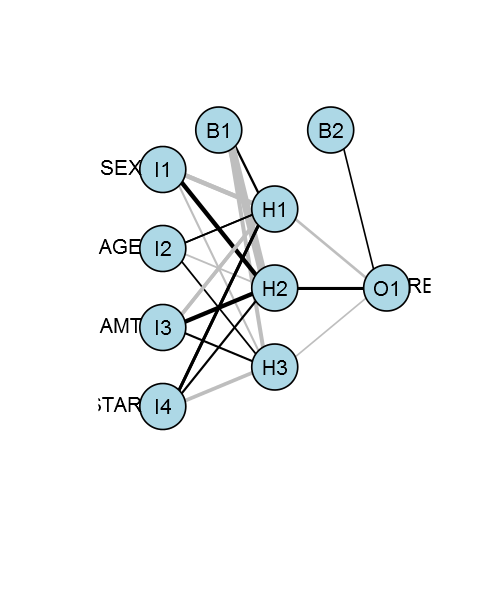

In [70]:
plot.nnet(nn_model)

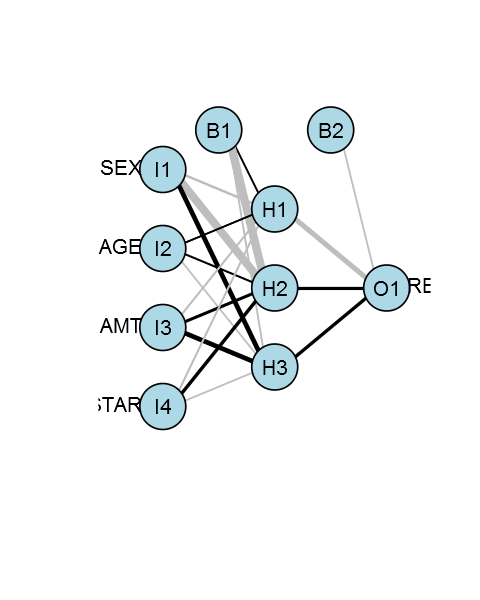

In [71]:
plot.nnet(nn_model2)

In [72]:
library(NeuralNetTools)

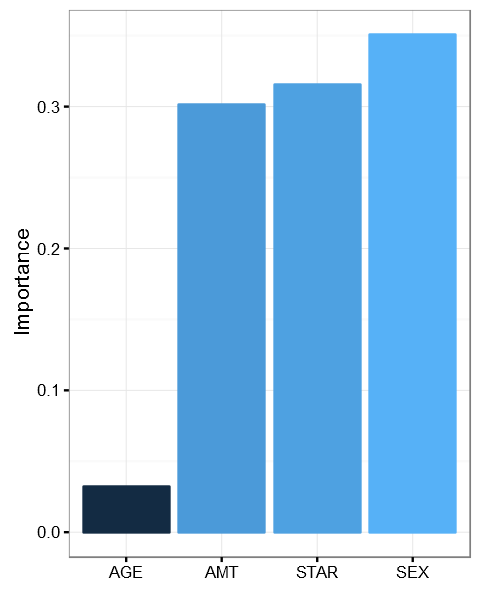

In [73]:
garson(nn_model)   # by 변수 중요도 순서

 - Nnet은 모델을 다 보더라도, weight를 계산하더라도, 이 변수의 의미를 보기에는 부족하다.
 - 모델 전체의 의미로 보고 참고용으로만 본다. 
 
 - **White Box Model : Decision tree **
 - **Black Box Model : Neural Network **

 #### Various Predict function 
 - 같은 predict여도, C5.0 or Nerual에 따라 값이 달라진다. 
 - Each Packages has each prediction, So ROCR::prediction means doing prediction in ROCR 
 - Neural network의 실제값으로 뽑아라 : type "raw"  <- ???

In [74]:
nn_pred <- ROCR::prediction(predict(nn_model, newdata=cb.test, type="raw"), cb.test$REFUND)

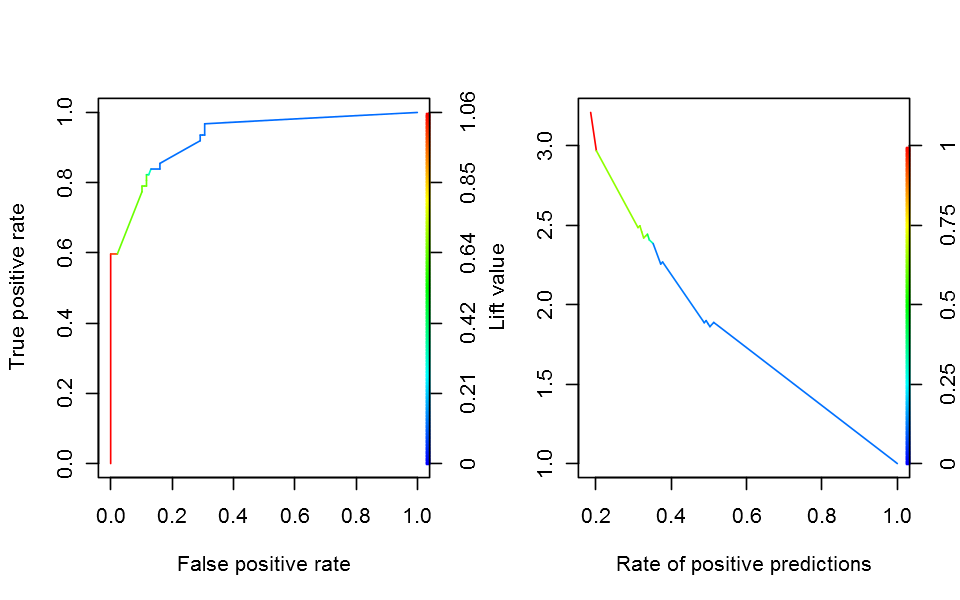

In [75]:
options(repr.plot.width=8,repr.plot.height=5)
par(mfrow=c(1,2))
nn_model.perf1 <- performance(nn_pred, "tpr", "fpr") # ROC-chart
nn_model.perf2 <- performance(nn_pred, "lift", "rpp") # Lift chart
plot(nn_model.perf1, colorize=TRUE); 
plot(nn_model.perf2, colorize=TRUE)

 - 다른 Data로 적용 시, 정확도 이슈 발생
 - Error 함수 as E(w) : weight가 커지면 Error가 커진다. 
 - 람다 as decay 값이 커질수록 w가 커지는 것을 방지한다. 

## 2. Neural Network Analysis using neuralnet package

In [76]:
library(neuralnet)

In [77]:
cb <- read.delim("Hshopping.txt", stringsAsFactors=FALSE)
colnames(cb) <- c("ID","SEX","AGE","AMT","STAR","REFUND")

 - neuralnet 패키지의 목표변수가 numeric이어야 한다. 
 - 시각화 부분이 좋지 못하다.
 - 예측을 할 경우 predict을 사용하지 않고 $compute$로 예측, gwplot as 종속변수의 의미도 추론 가능하다. 

In [78]:
set.seed(1)
inTrain <- createDataPartition(y=cb$REFUND, p=0.6, list=FALSE)
cb.train <- cb[inTrain,]
cb.test <- cb[-inTrain,]

 - threshold = value 
  - error change (에러함수의 결과치 차이(이전 결과와의 차이)가 0.01보다 작아지면 Stop 
 - hidden = c(2,2) 
  - nodes of first layer is $2$
  - nodes of second layer is $2$
 - hidden = c(2,3)
  - nodes of first layer is $2$
  - nodes of second layer is $3$
 - nnet 패키지보다 parameters가 많다 (threshold or stepmax 둘 중 하나를 주로 사용)
 - linear.output=T -> 출력층에는 굳이 log상용화 하지 않고 weight sum 한다 ($sigmoid$ 함수 적용 X)

In [79]:
set.seed(123)
nn2_model <- neuralnet(REFUND ~ SEX+AGE+AMT+STAR, 
                           data=cb.train, hidden=3, threshold=0.01)
nn2_model2 <- neuralnet(REFUND ~ SEX+AGE+AMT+STAR, 
                           data=cb.train, hidden=c(2,3), threshold=0.01)

In [80]:
plot(nn2_model)
plot(nn2_model2)

### result  of plots cell. 
 - Don't Print in Jupyter 
 - what is better than nnet packages
 
 <img src="./photo/plot1.PNG" width=450, align="left">
 <img src="./photo/plot2.PNG" width=450, align="right">

- 성별 as 1,0 only / 구매금액은 3단계 / 출연자 as binary / 나이 as 연속형
- 성별에 비해 나이는 어느 나이든 간에 weight가 거의 동일하다 : 큰 의미 없음
- 나이는 output 변수에 영향이 없다 
- 위아래로 많이 퍼져있는 변수의 경우, 의미를 가진다고 보면 된다 

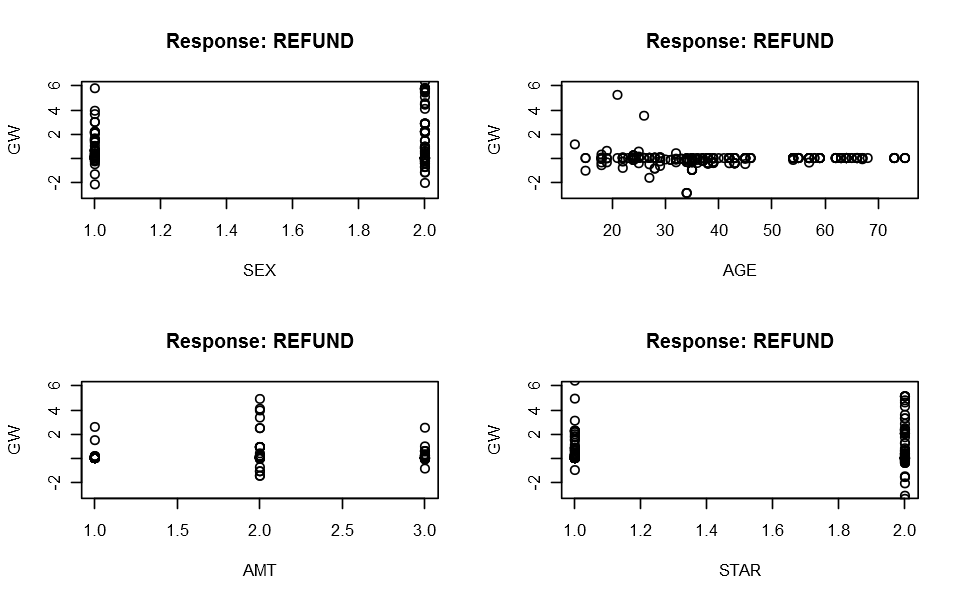

In [81]:
par(mfrow=c(2,2))
gwplot(nn2_model, selected.covariate = "SEX", min=-3, max=6)
gwplot(nn2_model, selected.covariate = "AGE", min=-3, max=6)
gwplot(nn2_model, selected.covariate = "AMT", min=-3, max=6)
gwplot(nn2_model, selected.covariate = "STAR", min=-3, max=6)

- pred이 아닌 compute
- 예측확률을 위해서는 $net.result를 추가한다 for result 출력 only
- 이 패키지만 예측할 때 쓰는 변수만 골라다가 지정해야 한다 (알아서 걸러내서 변수 지정 X) => covariate=cb.test[,c(2:5)]
- ID / 성별 / 나이 / 구매금액 / 출연자 / 반품여부

In [82]:
par(mfrow=c(1,1))
cb.test$nn2_pred_prob <- compute(nn2_model, covariate=cb.test[, c(2:5)])$net.result

- 다른 test에 비해 matrix로 연결해 주어야 한다 
- 예측값이 0.5보다 크면 1이고 작으면 0이다

In [83]:
cb.test$nn2_pred <- ifelse(cb.test$nn2_pred_prob > 0.5, 1, 0)

In [84]:
head(cb.test)

ID SEX AGE AMT STAR REFUND  nn2_pred_prob nn2_pred
1  1   1  33   2    2      0 0.495947227085        0
2  2   2  21   3    2      1 1.026415946588        1
3  3   1  45   1    1      0 0.006346103675        0
4  4   1  50   2    1      0 0.006343830214        0
5  5   1  21   3    1      1 0.748812659727        1
8  8   2  26   3    2      1 1.025860708434        1

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 128  13
         1  13  46
                                                
               Accuracy : 0.87                  
                 95% CI : (0.8153477, 0.9132916)
    No Information Rate : 0.705                 
    P-Value [Acc > NIR] : 0.00000002942981      
                                                
                  Kappa : 0.6874624             
 Mcnemar's Test P-Value : 1                     
                                                
            Sensitivity : 0.9078014             
            Specificity : 0.7796610             
         Pos Pred Value : 0.9078014             
         Neg Pred Value : 0.7796610             
             Prevalence : 0.7050000             
         Detection Rate : 0.6400000             
   Detection Prevalence : 0.7050000             
      Balanced Accuracy : 0.8437312             
                                                
       '

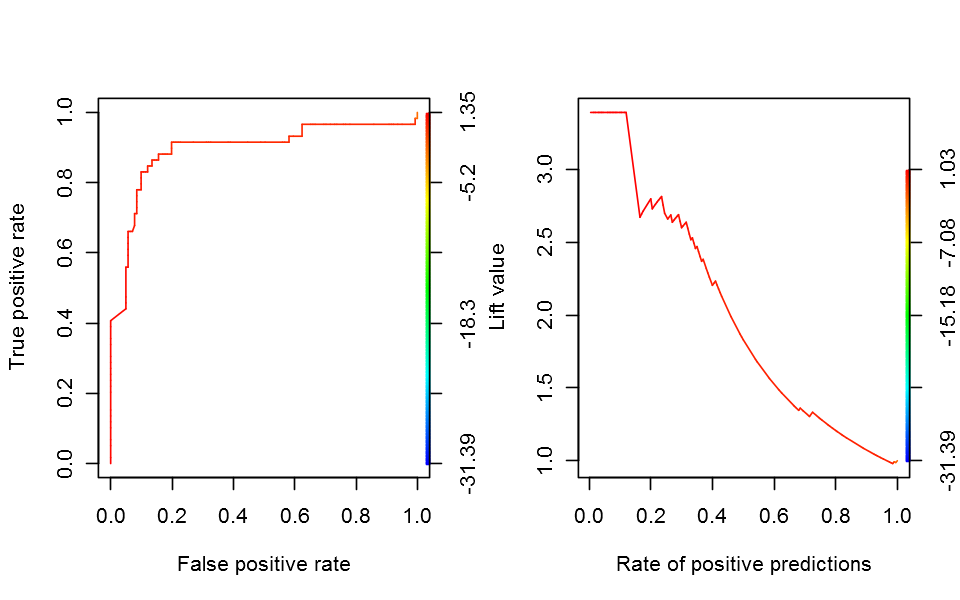

In [85]:
par(mfrow=c(1,2))
confusionMatrix(cb.test$nn2_pred, cb.test$REFUND)
nn2_pred <- ROCR::prediction(cb.test$nn2_pred_prob, cb.test$REFUND)
nn2_model.perf1 <- performance(nn2_pred, "tpr", "fpr") # ROC-chart
nn2_model.perf2 <- performance(nn2_pred, "lift", "rpp") # Lift chart
plot(nn2_model.perf1, colorize=TRUE); plot(nn2_model.perf2, colorize=TRUE)
par(mfrow=c(1,1))

## 3. Multinomial Classification using neuralnet
 - Neural net은 classification도 가능하다. 

In [86]:
data(iris)
# 예측값이 3개 이상인 경우 (Y에 명목형 변수가 3개 이상인 경우)

In [87]:
formula <- as.formula(paste('Species ~', 
                            paste(names(iris)[-length(iris)], collapse='+')))

In [88]:
head(iris)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa

- fails-! error cuz factor type for iris 
- neural은 factor 데이터 equals to error

In [89]:
m2 <- neuralnet(formula, iris, hidden=3, linear.output=FALSE)

ERROR: Error in neurons[[i]] %*% weights[[i]]: 수치 또는 복소수형태의 행렬 혹은 벡터 인자가 요구됩니다


- 범주별로 출력노드를 하나씩 만들고 (setosa/versicolor/virginica)
- 모델 출력시, 하나하나에 대해서 1 or 0이 뜨도록 모델별로 만든다

In [ ]:
trainData <- cbind(iris[, 1:4], class.ind(iris$Species)) # 다중 Class 분
head(trainData) # field 3개 추가됨 / setosa as 1, 나머지 as 0

In [ ]:
unique(trainData$setosa)

In [ ]:
m2 <- neuralnet(setosa + versicolor + virginica ~ Sepal.Length 
                + Sepal.Width + Petal.Length + Petal.Width, trainData, hidden=3) # 이또한 이진 분리로 나누어 진다. 

In [ ]:
plot(m2)

<img src="./photo/3.PNG" width=700>

 - 확률로 표현

In [ ]:
head(compute(m2, iris[, 1:4])$net.result) # 확률로 표현.

## 4. Input Normalization in Neural Networks
 - Normalization -> scaling 해준 것.
 - 때에 따라서는 정규화(normalization)과 평균화(standardization)을 구분하여 사용하는 경우도 있다. 
   <br>평균화는 모든 데이터의 값을 [0, 1] 의 구간으로 한정시키는 것으로, 다음과 같은 식을 사용할 수 있겠다. 
 <img src="./photo/4.PNG" align="left">

- data는 scale이 큰 쪽으로 영향을 받을 수 밖에 없다, normalization 필요!

In [90]:
normalize <- function (x) {
  normalized = (x - min(x)) / (max(x) - min(x))
  return(normalized)
}

In [95]:
cb <- read.delim("../1022_Decision Tree_2/Hshopping.txt", stringsAsFactors=FALSE)
colnames(cb) <- c("ID","SEX","AGE","AMT","STAR","REFUND")

cb$AGE <- normalize(cb$AGE)
cb$AMT <- normalize(cb$AMT)

In [96]:
set.seed(1)
inTrain <- createDataPartition(y=cb$REFUND, p=0.6, list=FALSE)
cb.train <- cb[inTrain,]
cb.test <- cb[-inTrain,]

In [97]:
set.seed(123)
nn3_model <- neuralnet(REFUND ~ SEX+AGE+AMT+STAR, data=cb.train, hidden=3, threshold=0.01)

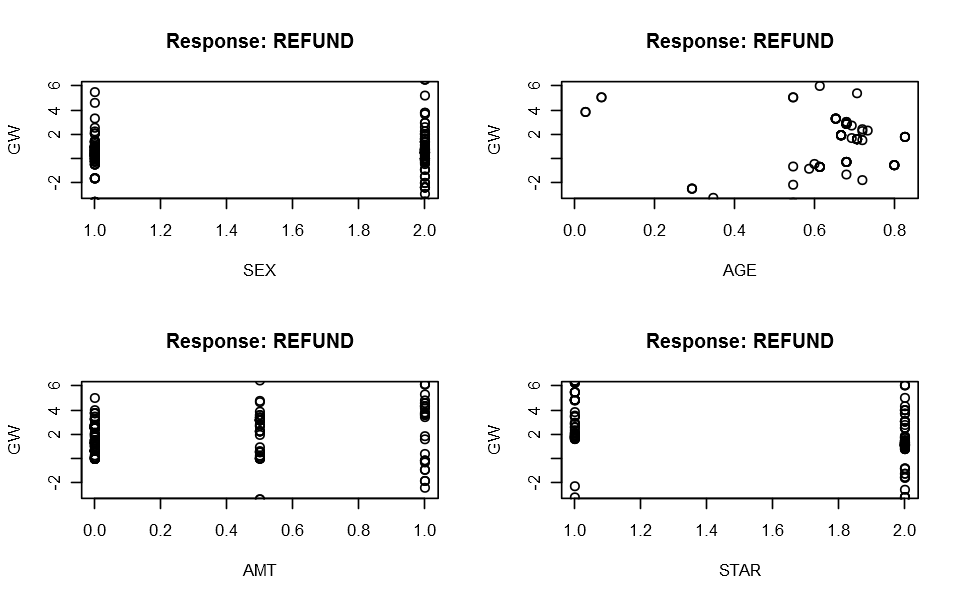

In [99]:
par(mfrow=c(2,2))
gwplot(nn3_model, selected.covariate = "SEX", min=-3, max=6)
gwplot(nn3_model, selected.covariate = "AGE", min=-3, max=6)
gwplot(nn3_model, selected.covariate = "AMT", min=-3, max=6)
gwplot(nn3_model, selected.covariate = "STAR", min=-3, max=6)
par(mfrow=c(1,1))

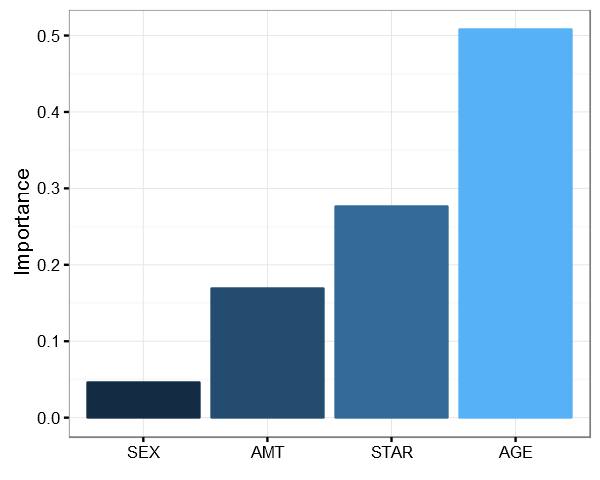

In [103]:
options(repr.plot.width=5, repr.plot.height=4)
garson(nn3_model)

In [104]:
cb.test$nn3_pred_prob <- compute(nn3_model, covariate=cb.test[, c(2:5)])$net.result
cb.test$nn3_pred <- ifelse(cb.test$nn3_pred_prob > 0.5, 1, 0)
confusionMatrix(cb.test$nn3_pred, cb.test$REFUND)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 131  12
         1  10  47
                                                
               Accuracy : 0.89                  
                 95% CI : (0.8382038, 0.9297668)
    No Information Rate : 0.705                 
    P-Value [Acc > NIR] : 0.0000000003254392    
                                                
                  Kappa : 0.7329125             
 Mcnemar's Test P-Value : 0.8311704             
                                                
            Sensitivity : 0.9290780             
            Specificity : 0.7966102             
         Pos Pred Value : 0.9160839             
         Neg Pred Value : 0.8245614             
             Prevalence : 0.7050000             
         Detection Rate : 0.6550000             
   Detection Prevalence : 0.7150000             
      Balanced Accuracy : 0.8628441             
                                                
       '

## 5. Model Comparison

In [106]:
nn3_pred <- ROCR::prediction(cb.test$nn3_pred_prob, cb.test$REFUND)
nn3_model.perf1 <- performance(nn3_pred, "tpr", "fpr") # ROC-chart

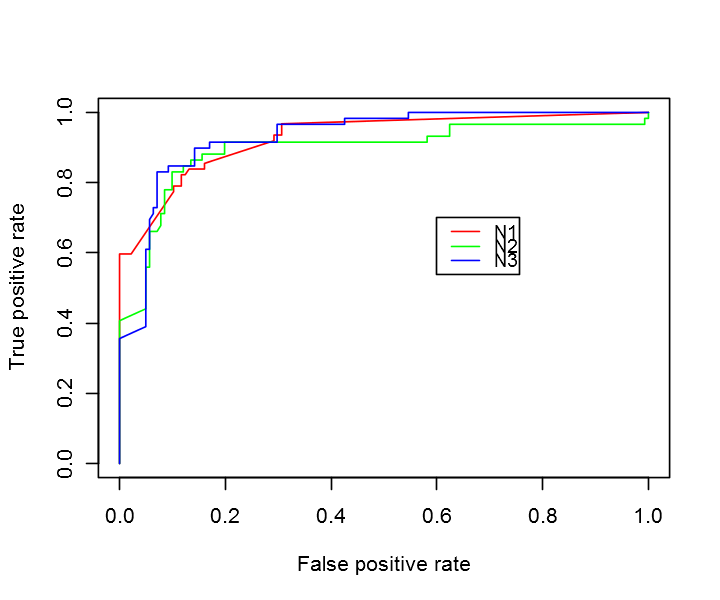

In [109]:
options(repr.plot.width=6, repr.plot.height=5)
par(mfrow=c(1,1))
plot(nn_model.perf1, col="red")
plot(nn2_model.perf1, col="green", add=T)
plot(nn3_model.perf1, col="blue", add=T)
legend(0.6,0.7,c("N1","N2","N3"),cex=0.9,col=c("red","green","blue"),lty=1)

In [110]:
performance(nn_pred, "auc")@y.values[[1]] 
performance(nn2_pred, "auc")@y.values[[1]]
performance(nn3_pred, "auc")@y.values[[1]] 
# AUC = ROC curve의 넓

[1] 0.9286555215

[1] 0.8942781584

[1] 0.9308210121